# Natural Language Processing with calssification and vector spaces

## Word Embeddings : Predict the countries from capitals

In [ ]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Load the dataset
#from google.colab import files
#uploaded = files.upload()

In [ ]:
data = pd.read_csv('capitals.txt', delimiter=' ')
data.columns = ['City1', 'Country1', 'City2', 'Country2']
data.head()

,City1,Country1,City2,Country2
0,Athens,Greece,Bangkok,Thailand
1,Athens,Greece,Beijing,China
2,Athens,Greece,Berlin,Germany
3,Athens,Greece,Bern,Switzerland
4,Athens,Greece,Cairo,Egypt


In [ ]:
data.shape

(4951, 4)

In the real world, you can always load the trained word vectors, and you will almost never have to train them from scratch.

**Word Embedding**

In [ ]:
word_embeddings = pickle.load((open('word_embeddings_subset.p', 'rb')))
len(word_embeddings)

243

In [ ]:
# dimension of each word Embedding
word_embeddings['Spain'].shape[0]

300

**Cosine Similarity**

In [ ]:
def cosine_similarity(A, B):
  num = np.dot(A, B)
  den = np.linalg.norm(A) * np.linalg.norm(B)
  return num/den

In [ ]:
# Testing the function 
king = word_embeddings['king']
queen = word_embeddings['queen']

cosine_similarity(king, queen)

0.6510956

**Euclidean Distance**

In [ ]:
def euclidean(A, B):
  res = np.linalg.norm(A-B)
  return res

In [ ]:
# Testing the function
euclidean(king, queen)

2.4796925

**Finding the country with capital**

In [ ]:
def get_country(city1, country1, city2, word_embeddings):
  group = set((city1, country1, city2))

  city1_emb = word_embeddings[city1]
  country1_emb = word_embeddings[country1]
  city2_emb = word_embeddings[city2]

  similarity = -1

  # get embedding of country 2
  vec= country1_emb - city1_emb + city2_emb

  country = ''

  for word in word_embeddings.keys():
    if word not in group:
      word_emb = word_embeddings[word]

      # calculate the similarities
      c_similarity = cosine_similarity(vec, word_emb)

      if c_similarity > similarity:
        similarity = c_similarity
        country = (word, similarity)
  return country

In [ ]:
# Testing the function
get_country('Athens', 'Greece', 'Cairo', word_embeddings)

('Egypt', 0.7626821)

**Model Accuracy**

In [ ]:
def get_accuracy(word_embeddings, data):
  num_correct = 0
  for i, row in data.iterrows():
    city1 = row['City1']
    country1 = row['Country1']
    city2 = row['City2']

    pred_country2, _ = get_country(city1, country1, city2, word_embeddings)

    if pred_country2 == row['Country2']:
      num_correct+=1
    
    accurcay = num_correct/len(data)
  
  return accurcay

In [ ]:
# Testing the function
accuracy = get_accuracy(word_embeddings, data)
print('The accurcay of the model comes to be :%0.2f'%accuracy)

The accurcay of the model comes to be :0.92


##Plotting the vectores using PCA

The steps to compute PCA are as follows:

1. Mean normalize the data

2. Compute the covariance matrix of your data ($\Sigma$).

3. Compute the eigenvectors and the eigenvalues of your covariance matrix

4. Multiply the first K eigenvectors by your normalized data

In [ ]:
def compute_pca(X, n_components=2):

  # mean center the data
  X_demeaned = X - np.mean(X, axis=0)

  # calculate the covarirance matrix
  covariance_matrix = np.cov(X_demeaned, rowvar=False)

  # calculate eigenvectors & eigenvalues of the covariance matrix
  eigen_vals, eigen_vecs = np.linalg.eigh(covariance_matrix, UPLO='L') 

  # sort the eigen values 
  idx_sorted = np.argsort(eigen_vals)
  
  # sort the eigen values from highest to lowest
  idx_sorted = idx_sorted[::-1]
  
  # sort the eigen values by index_sort
  eigen_values_sorted = eigen_vals[idx_sorted]

  # sort the eigen vectors
  sorted_eigen_vecs = eigen_vecs[:, idx_sorted]

  eigen_vec_subset = sorted_eigen_vecs[:, 0:n_components]
  
  X_reduced = np.dot(eigen_vec_subset.T, X_demeaned.T).T

  return X_reduced

In [ ]:
np.random.seed(1)
X = np.random.rand(3, 10)
#print(X)
X_reduced = compute_pca(X, n_components=2)
#print('The reduced X : \n', X_reduced)
print("Your original matrix was " + str(X.shape) + " and it became:")
print(X_reduced)


Your original matrix was (3, 10) and it became:
[[ 0.43437323  0.49820384]
 [ 0.42077249 -0.50351448]
 [-0.85514571  0.00531064]]


In [ ]:
def get_vectors(embeddings, words):
  
    m = len(words)
    X = np.zeros((1, 300))
    for word in words:
        english = word
        eng_emb = embeddings[english]
        X = np.row_stack((X, eng_emb))
    X = X[1:,:]
    return X

In [ ]:
words = ['oil', 'gas', 'happy', 'sad', 'city', 'town',
         'village', 'country', 'continent', 'petroleum', 'joyful']

# given a list of words and the embeddings, it returns a matrix with all the embeddings
X = get_vectors(word_embeddings, words)

print('You have 11 words each of 300 dimensions thus X.shape is:', X.shape)

You have 11 words each of 300 dimensions thus X.shape is: (11, 300)


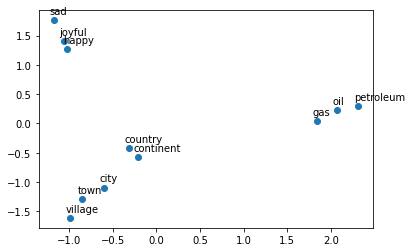

In [ ]:
result = compute_pca(X, 2)
plt.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0] - 0.05, result[i, 1] + 0.1))

plt.show()